In [50]:
import pandas as pd
test_path = test_path = "C:\\Users\\gotlu\\Downloads\\bike sharing testing dataset\\day.csv"
test_df = pd.read_csv(test_path)
print(test_df.head())


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def Calculate_vif(X):
    '''
    Calculating VIF
    '''
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [52]:
Calculate_vif(test_df[[i for i in test_df.describe().columns if i not in ['cnt']]])


,variables,VIF
0,instant,2211.202098
1,season,24.818167
2,yr,842.229037
3,mnth,643.004155
4,holiday,1.109868
5,weekday,3.263859
6,workingday,9.464035
7,weathersit,14.582932
8,temp,500.149047
9,atemp,578.778457


In [53]:
Calculate_vif(test_df[[i for i in test_df.describe().columns if i not in ['cnt','hum']]])

,variables,VIF
0,instant,2201.929941
1,season,24.745924
2,yr,838.717304
3,mnth,638.791230
4,holiday,1.104094
5,weekday,3.256026
6,workingday,9.401511
7,weathersit,8.037623
8,temp,474.478477
9,atemp,533.432676


In [54]:
Calculate_vif(test_df[[i for i in test_df.describe().columns if i not in ['cnt','hum','windspeed']]])


,variables,VIF
0,instant,2139.672286
1,season,24.693473
2,yr,811.573258
3,mnth,622.076675
4,holiday,1.097284
5,weekday,3.151211
6,workingday,9.234084
7,weathersit,7.539750
8,temp,474.421122
9,atemp,533.064044


In [55]:
Calculate_vif(test_df[[i for i in test_df.describe().columns if i not in ['cnt','hum','windspeed','registered']]])


,variables,VIF
0,instant,2129.516149
1,season,21.515650
2,yr,797.718994
3,mnth,619.765811
4,holiday,1.096264
5,weekday,3.129574
6,workingday,5.976549
7,weathersit,5.998579
8,temp,474.421029
9,atemp,529.845258


In [56]:
Calculate_vif(test_df[[i for i in test_df.describe().columns if i not in ['cnt','hum','windspeed','registered','temp']]])


,variables,VIF
0,instant,2090.256259
1,season,21.471321
2,yr,782.557599
3,mnth,608.149962
4,holiday,1.096260
5,weekday,3.128534
6,workingday,5.972019
7,weathersit,5.867618
8,atemp,17.851212
9,casual,7.722280


In [57]:
Calculate_vif(test_df[[i for i in test_df.describe().columns if i not in ['cnt','hum','windspeed','registered','temp','mnth']]])


,variables,VIF
0,instant,52.027175
1,season,20.865952
2,yr,22.231149
3,holiday,1.090455
4,weekday,3.105849
5,workingday,5.896681
6,weathersit,5.473536
7,atemp,17.762677
8,casual,7.664728


In [58]:
Calculate_vif(test_df[[i for i in test_df.describe().columns if i not in ['cnt','hum','windspeed','registered','temp','mnth','instant']]])


,variables,VIF
0,season,6.589208
1,yr,2.261050
2,holiday,1.089228
3,weekday,3.101602
4,workingday,5.863143
5,weathersit,5.473061
6,atemp,17.752082
7,casual,7.601939


In [59]:
print(test_df.columns.tolist())

['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


In [60]:
import numpy as np
test_df['Season1'] = np.where(test_df['season'] == 1, 1, 0)
test_df['Season2'] = np.where(test_df['season'] == 2, 1, 0)
test_df['Season3'] = np.where(test_df['season'] == 3, 1, 0)
test_df['Season4'] = np.where(test_df['season'] == 4, 1, 0)

# Drop the original 'season' column
test_df.drop(columns=['season'], axis=1, inplace=True)
test_df.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Season1,Season2,Season3,Season4
0,1,01-01-2018,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0
1,2,02-01-2018,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0
2,3,03-01-2018,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0
3,4,04-01-2018,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0
4,5,05-01-2018,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0


In [61]:
test_df.drop('instant',inplace=True,axis=1)

In [62]:
test_df.drop('casual',inplace=True,axis=1)

In [63]:
test_df.drop('registered',inplace=True,axis=1)

In [69]:
test_df.drop('atemp',inplace=True,axis=1)

In [71]:
test_df.drop('dteday',inplace=True,axis=1)

In [72]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   mnth        730 non-null    int64  
 2   holiday     730 non-null    int64  
 3   weekday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    int64  
 6   temp        730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   cnt         730 non-null    int64  
 10  Season1     730 non-null    int64  
 11  Season2     730 non-null    int64  
 12  Season3     730 non-null    int64  
 13  Season4     730 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 80.0 KB


In [73]:
test_df.columns


Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp',
       'hum', 'windspeed', 'cnt', 'Season1', 'Season2', 'Season3', 'Season4'],
      dtype='object')

In [74]:
test_df.isnull().sum()

yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
cnt           0
Season1       0
Season2       0
Season3       0
Season4       0
dtype: int64

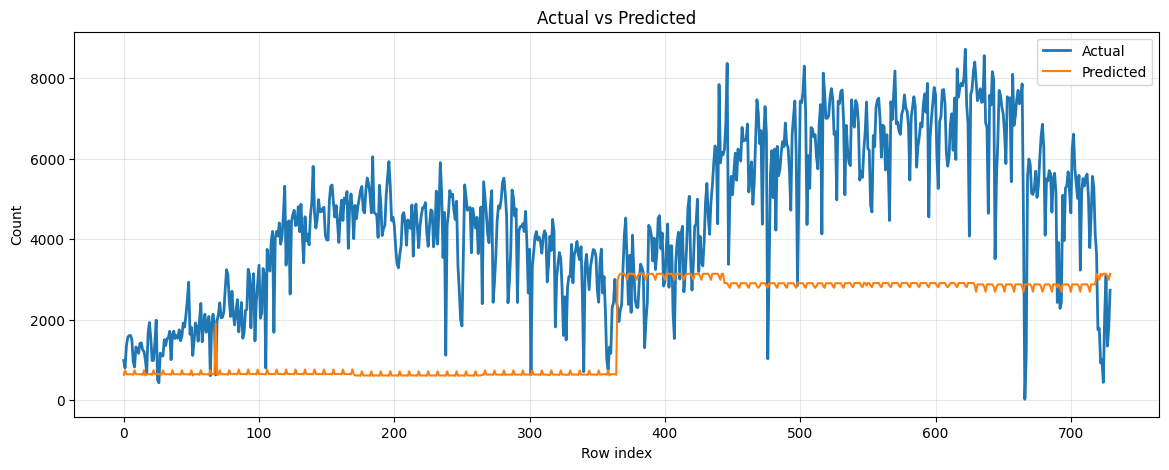

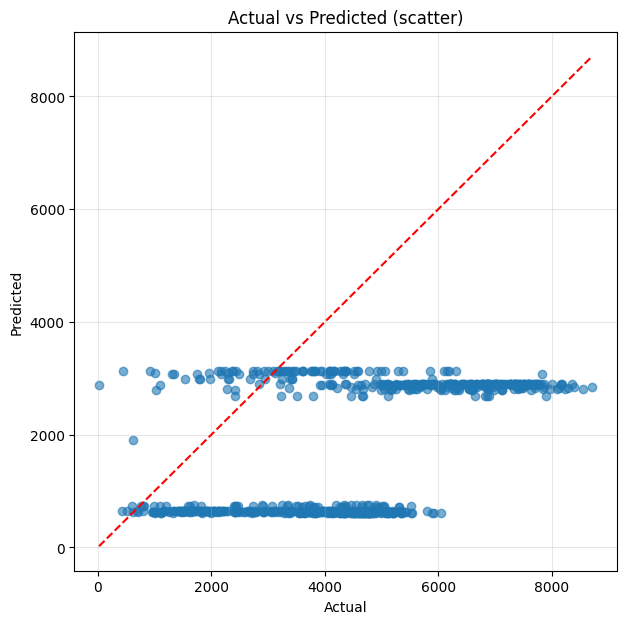

Saved predictions_full.csv — rows: 730


In [75]:
# ...existing code...
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from pathlib import Path

# drop target
if 'cnt' in test_df.columns:
    df_features = test_df.drop(columns=['cnt'])
else:
    df_features = test_df.copy()

# drop any remaining object columns (dates etc.) since model expects numeric
obj_cols = df_features.select_dtypes(include=['object']).columns.tolist()
if obj_cols:
    df_features.drop(columns=obj_cols, inplace=True)

# 3) load model + scaler
model_path = Path("grad_tuned_model.pkl")
model = joblib.load(model_path)
scaler = None
scaler_path = Path("scaler.pkl")
if scaler_path.exists():
    scaler = joblib.load(scaler_path)

# 4) align features with model
if hasattr(model, "feature_names_in_"):
    req = list(model.feature_names_in_)
    missing = [c for c in req if c not in df_features.columns]
    extra = [c for c in df_features.columns if c not in req]
    if missing:
        raise ValueError(f"Missing columns required by model: {missing}")
    if extra:
        # drop extras and reorder
        df_features = df_features[req]
    X = df_features.values
else:
    # no feature names stored — rely on numeric columns and n_features_in_
    n_req = getattr(model, "n_features_in_", None)
    numeric = df_features.select_dtypes(include=[np.number])
    if n_req is not None and numeric.shape[1] == n_req:
        X = numeric.values
    elif n_req is not None and numeric.shape[1] != n_req:
        # give clear diagnostic to decide next step
        print("Model expects", n_req, "features but test numeric features:", numeric.shape[1])
        print("Test numeric columns:\n", numeric.columns.tolist())
        # If you want automatic trimming: remove last columns until match (risky)
        raise ValueError("Feature count mismatch — inspect above lists and adapt preprocessing to match training features.")
    else:
        # no n_features_in_ — fall back
        X = numeric.values

# 5) apply scaler if available
if scaler is not None:
    X = scaler.transform(X)

# 6) predict and inverse-transform (trained on sqrt(cnt))
pred_sqrt = model.predict(X)
pred_cnt = np.rint(np.square(pred_sqrt)).astype(int)

# 7) results and plots
comparison = pd.DataFrame({"Actual": actual_cnt, "Predicted": pred_cnt})
plt.figure(figsize=(14,5))
plt.plot(comparison['Actual'], label='Actual', linewidth=2)
plt.plot(comparison['Predicted'], label='Predicted', linewidth=1.5)
plt.xlabel('Row index'); plt.ylabel('Count'); plt.title('Actual vs Predicted')
plt.legend(); plt.grid(alpha=0.3); plt.show()

plt.figure(figsize=(7,7))
plt.scatter(comparison['Actual'], comparison['Predicted'], alpha=0.6)
mn, mx = comparison['Actual'].min(), comparison['Actual'].max()
plt.plot([mn,mx],[mn,mx],'r--'); plt.xlabel('Actual'); plt.ylabel('Predicted'); plt.title('Actual vs Predicted (scatter)')
plt.grid(alpha=0.3); plt.show()

comparison.to_csv("predictions_full.csv", index=False)
print("Saved predictions_full.csv — rows:", len(pred_cnt))
# ...existing code...

In [77]:
# ...existing code...
import pandas as pd
import numpy as np

# get dataframe: prefer in-memory `comparison`, fallback to saved CSV
if 'comparison' in globals():
    df = comparison.copy()
else:
    df = pd.read_csv("predictions_full.csv")

# include row index and ensure columns named clearly
df = df.reset_index().rename(columns={'index':'row_index'})

# save full values to CSV and print brief summary + first/last rows
out_path = "predictions_full_values.csv"
df.to_csv(out_path, index=False)
print(f"Saved all values to: {out_path}\nRows: {len(df)}\n")

print("First 10 rows:")
print(df.head(10).to_string(index=False))

print("\nLast 10 rows:")
print(df.tail(10).to_string(index=False))

print("\nSummary statistics (Actual vs Predicted):")
print(df[['Actual','Predicted']].describe())

# If you want to display all rows in the notebook (careful for large datasets):
# pd.set_option('display.max_rows', None)
# display(df)
# pd.reset_option('display.max_rows')
# ...existing code...

Saved all values to: predictions_full_values.csv
Rows: 730

First 10 rows:
 row_index  Actual  Predicted
         0     985        627
         1     801        743
         2    1349        643
         3    1562        643
         4    1600        643
         5    1606        643
         6    1510        643
         7     959        627
         8     822        743
         9    1321        643

Last 10 rows:
 row_index  Actual  Predicted
       720    1749       3074
       721    1787       2988
       722     920       3137
       723    1013       3090
       724     441       3137
       725    2114       3137
       726    3095       3137
       727    1341       3074
       728    1796       2988
       729    2729       3137

Summary statistics (Actual vs Predicted):
            Actual    Predicted
count   730.000000   730.000000
mean   4508.006849  1787.171233
std    1936.011647  1141.575769
min      22.000000   603.000000
25%    3169.750000   639.000000
50%    4548.500

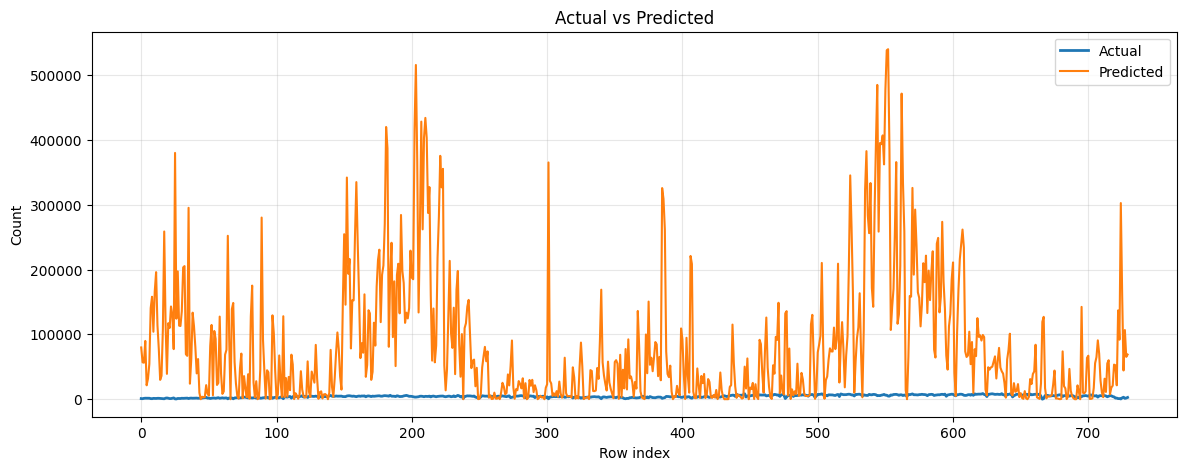

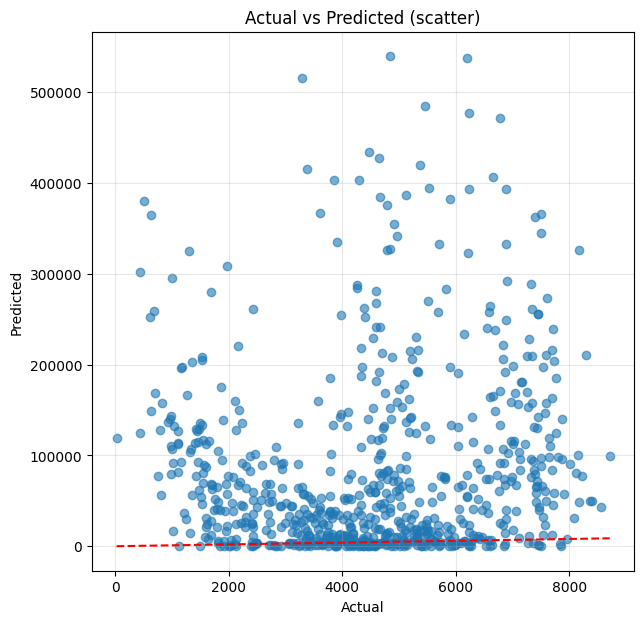

Saved predictions_full.csv — rows: 730


In [78]:
# ...existing code...
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from pathlib import Path

# drop target
if 'cnt' in test_df.columns:
    df_features = test_df.drop(columns=['cnt'])
else:
    df_features = test_df.copy()

# drop any remaining object columns (dates etc.) since model expects numeric
obj_cols = df_features.select_dtypes(include=['object']).columns.tolist()
if obj_cols:
    df_features.drop(columns=obj_cols, inplace=True)

# 3) load model + scaler
model_path = Path("lasso_reg.pkl")
model = joblib.load(model_path)
scaler = None
scaler_path = Path("scaler.pkl")
if scaler_path.exists():
    scaler = joblib.load(scaler_path)

# 4) align features with model
if hasattr(model, "feature_names_in_"):
    req = list(model.feature_names_in_)
    missing = [c for c in req if c not in df_features.columns]
    extra = [c for c in df_features.columns if c not in req]
    if missing:
        raise ValueError(f"Missing columns required by model: {missing}")
    if extra:
        # drop extras and reorder
        df_features = df_features[req]
    X = df_features.values
else:
    # no feature names stored — rely on numeric columns and n_features_in_
    n_req = getattr(model, "n_features_in_", None)
    numeric = df_features.select_dtypes(include=[np.number])
    if n_req is not None and numeric.shape[1] == n_req:
        X = numeric.values
    elif n_req is not None and numeric.shape[1] != n_req:
        # give clear diagnostic to decide next step
        print("Model expects", n_req, "features but test numeric features:", numeric.shape[1])
        print("Test numeric columns:\n", numeric.columns.tolist())
        # If you want automatic trimming: remove last columns until match (risky)
        raise ValueError("Feature count mismatch — inspect above lists and adapt preprocessing to match training features.")
    else:
        # no n_features_in_ — fall back
        X = numeric.values

# 5) apply scaler if available
if scaler is not None:
    X = scaler.transform(X)

# 6) predict and inverse-transform (trained on sqrt(cnt))
pred_sqrt = model.predict(X)
pred_cnt = np.rint(np.square(pred_sqrt)).astype(int)

# 7) results and plots
comparison = pd.DataFrame({"Actual": actual_cnt, "Predicted": pred_cnt})
plt.figure(figsize=(14,5))
plt.plot(comparison['Actual'], label='Actual', linewidth=2)
plt.plot(comparison['Predicted'], label='Predicted', linewidth=1.5)
plt.xlabel('Row index'); plt.ylabel('Count'); plt.title('Actual vs Predicted')
plt.legend(); plt.grid(alpha=0.3); plt.show()

plt.figure(figsize=(7,7))
plt.scatter(comparison['Actual'], comparison['Predicted'], alpha=0.6)
mn, mx = comparison['Actual'].min(), comparison['Actual'].max()
plt.plot([mn,mx],[mn,mx],'r--'); plt.xlabel('Actual'); plt.ylabel('Predicted'); plt.title('Actual vs Predicted (scatter)')
plt.grid(alpha=0.3); plt.show()

comparison.to_csv("predictions_full.csv", index=False)
print("Saved predictions_full.csv — rows:", len(pred_cnt))
# ...existing code...

In [79]:
# ...existing code...
import pandas as pd
import numpy as np

# get dataframe: prefer in-memory `comparison`, fallback to saved CSV
if 'comparison' in globals():
    df = comparison.copy()
else:
    df = pd.read_csv("predictions_full.csv")

# include row index and ensure columns named clearly
df = df.reset_index().rename(columns={'index':'row_index'})

# save full values to CSV and print brief summary + first/last rows
out_path = "predictions_full_values.csv"
df.to_csv(out_path, index=False)
print(f"Saved all values to: {out_path}\nRows: {len(df)}\n")

print("First 10 rows:")
print(df.head(10).to_string(index=False))

print("\nLast 10 rows:")
print(df.tail(10).to_string(index=False))

print("\nSummary statistics (Actual vs Predicted):")
print(df[['Actual','Predicted']].describe())

# If you want to display all rows in the notebook (careful for large datasets):
# pd.set_option('display.max_rows', None)
# display(df)
# pd.reset_option('display.max_rows')
# ...existing code...

Saved all values to: predictions_full_values.csv
Rows: 730

First 10 rows:
 row_index  Actual  Predicted
         0     985      79825
         1     801      56902
         2    1349      56309
         3    1562      89888
         4    1600      21498
         5    1606      31619
         6    1510      54407
         7     959     140489
         8     822     157985
         9    1321     104032

Last 10 rows:
 row_index  Actual  Predicted
       720    1749      52285
       721    1787      21480
       722     920     136986
       723    1013      91804
       724     441     302462
       725    2114     160267
       726    3095      44330
       727    1341     106641
       728    1796      65285
       729    2729      68838

Summary statistics (Actual vs Predicted):
            Actual     Predicted
count   730.000000     730.00000
mean   4508.006849   83102.99726
std    1936.011647  100631.74523
min      22.000000       0.00000
25%    3169.750000    9877.00000
50%    45

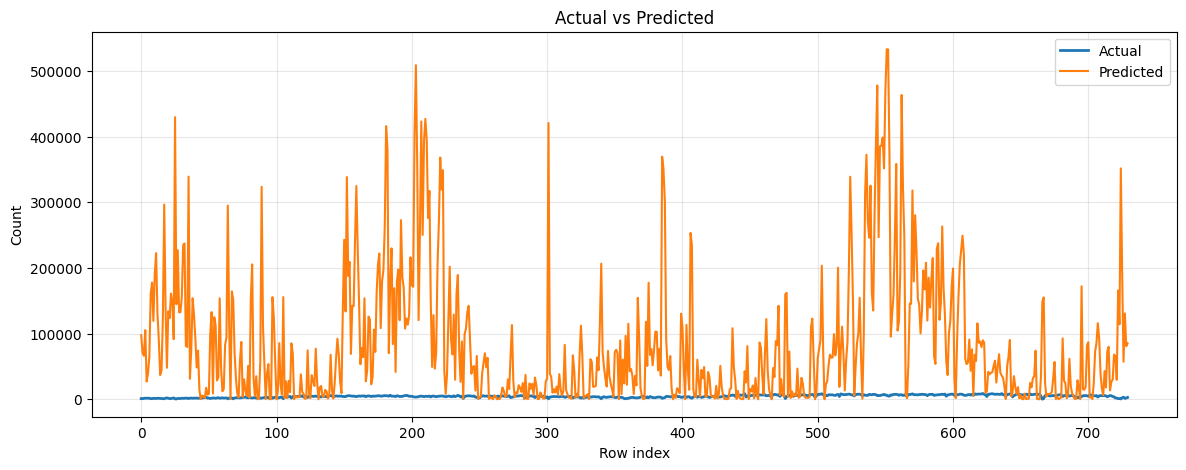

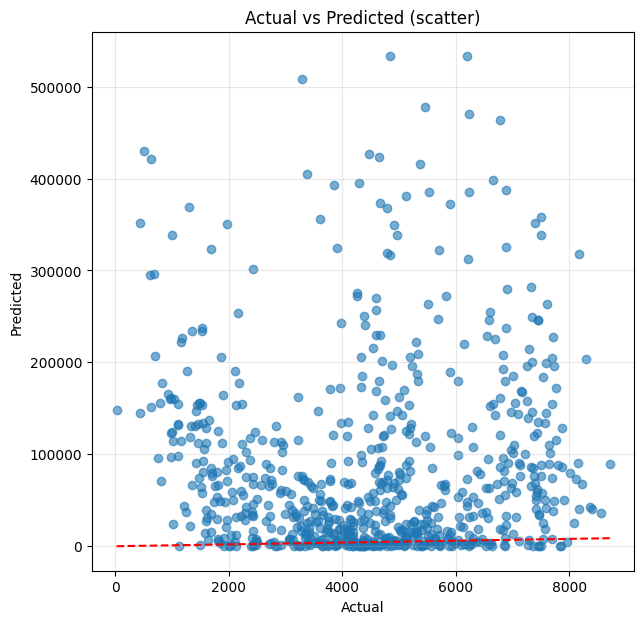

Saved predictions_full.csv — rows: 730


In [80]:
# ...existing code...
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from pathlib import Path

# drop target
if 'cnt' in test_df.columns:
    df_features = test_df.drop(columns=['cnt'])
else:
    df_features = test_df.copy()

# drop any remaining object columns (dates etc.) since model expects numeric
obj_cols = df_features.select_dtypes(include=['object']).columns.tolist()
if obj_cols:
    df_features.drop(columns=obj_cols, inplace=True)

# 3) load model + scaler
model_path = Path("ridge_reg.pkl")
model = joblib.load(model_path)
scaler = None
scaler_path = Path("scaler.pkl")
if scaler_path.exists():
    scaler = joblib.load(scaler_path)

# 4) align features with model
if hasattr(model, "feature_names_in_"):
    req = list(model.feature_names_in_)
    missing = [c for c in req if c not in df_features.columns]
    extra = [c for c in df_features.columns if c not in req]
    if missing:
        raise ValueError(f"Missing columns required by model: {missing}")
    if extra:
        # drop extras and reorder
        df_features = df_features[req]
    X = df_features.values
else:
    # no feature names stored — rely on numeric columns and n_features_in_
    n_req = getattr(model, "n_features_in_", None)
    numeric = df_features.select_dtypes(include=[np.number])
    if n_req is not None and numeric.shape[1] == n_req:
        X = numeric.values
    elif n_req is not None and numeric.shape[1] != n_req:
        # give clear diagnostic to decide next step
        print("Model expects", n_req, "features but test numeric features:", numeric.shape[1])
        print("Test numeric columns:\n", numeric.columns.tolist())
        # If you want automatic trimming: remove last columns until match (risky)
        raise ValueError("Feature count mismatch — inspect above lists and adapt preprocessing to match training features.")
    else:
        # no n_features_in_ — fall back
        X = numeric.values

# 5) apply scaler if available
if scaler is not None:
    X = scaler.transform(X)

# 6) predict and inverse-transform (trained on sqrt(cnt))
pred_sqrt = model.predict(X)
pred_cnt = np.rint(np.square(pred_sqrt)).astype(int)

# 7) results and plots
comparison = pd.DataFrame({"Actual": actual_cnt, "Predicted": pred_cnt})
plt.figure(figsize=(14,5))
plt.plot(comparison['Actual'], label='Actual', linewidth=2)
plt.plot(comparison['Predicted'], label='Predicted', linewidth=1.5)
plt.xlabel('Row index'); plt.ylabel('Count'); plt.title('Actual vs Predicted')
plt.legend(); plt.grid(alpha=0.3); plt.show()

plt.figure(figsize=(7,7))
plt.scatter(comparison['Actual'], comparison['Predicted'], alpha=0.6)
mn, mx = comparison['Actual'].min(), comparison['Actual'].max()
plt.plot([mn,mx],[mn,mx],'r--'); plt.xlabel('Actual'); plt.ylabel('Predicted'); plt.title('Actual vs Predicted (scatter)')
plt.grid(alpha=0.3); plt.show()

comparison.to_csv("predictions_full.csv", index=False)
print("Saved predictions_full.csv — rows:", len(pred_cnt))
# ...existing code...

In [81]:
# ...existing code...
import pandas as pd
import numpy as np

# get dataframe: prefer in-memory `comparison`, fallback to saved CSV
if 'comparison' in globals():
    df = comparison.copy()
else:
    df = pd.read_csv("predictions_full.csv")

# include row index and ensure columns named clearly
df = df.reset_index().rename(columns={'index':'row_index'})

# save full values to CSV and print brief summary + first/last rows
out_path = "predictions_full_values.csv"
df.to_csv(out_path, index=False)
print(f"Saved all values to: {out_path}\nRows: {len(df)}\n")

print("First 10 rows:")
print(df.head(10).to_string(index=False))

print("\nLast 10 rows:")
print(df.tail(10).to_string(index=False))

print("\nSummary statistics (Actual vs Predicted):")
print(df[['Actual','Predicted']].describe())

# If you want to display all rows in the notebook (careful for large datasets):
# pd.set_option('display.max_rows', None)
# display(df)
# pd.reset_option('display.max_rows')
# ...existing code...

Saved all values to: predictions_full_values.csv
Rows: 730

First 10 rows:
 row_index  Actual  Predicted
         0     985      97562
         1     801      70456
         2    1349      66184
         3    1562     105264
         4    1600      26942
         5    1606      38928
         6    1510      64375
         7     959     159986
         8     822     177749
         9    1321     119201

Last 10 rows:
 row_index  Actual  Predicted
       720    1749      65437
       721    1787      29533
       722     920     165436
       723    1013     114091
       724     441     351523
       725    2114     190168
       726    3095      57107
       727    1341     130669
       728    1796      80687
       729    2729      85041

Summary statistics (Actual vs Predicted):
            Actual      Predicted
count   730.000000     730.000000
mean   4508.006849   84151.567123
std    1936.011647  100166.126480
min      22.000000       0.000000
25%    3169.750000   10222.750000
50%

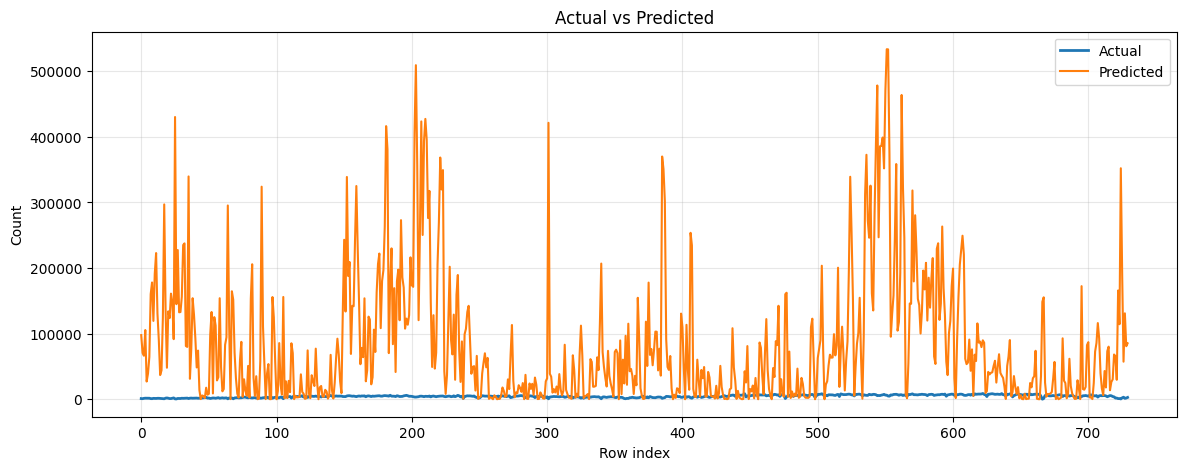

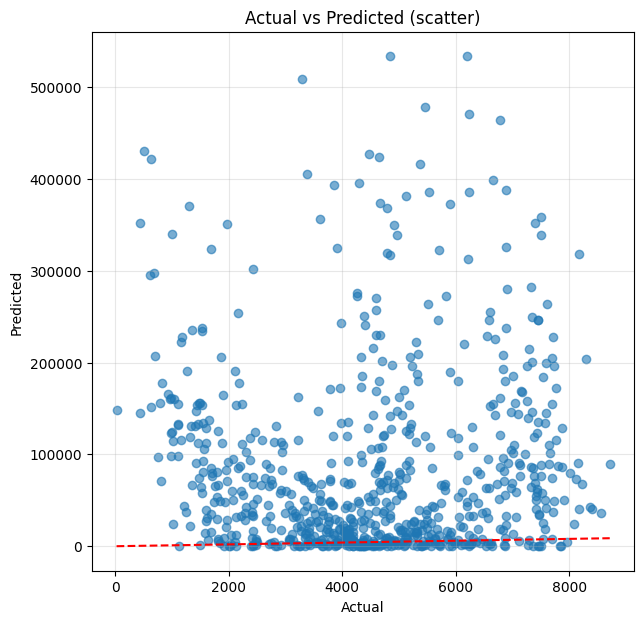

Saved predictions_full.csv — rows: 730


In [82]:
# ...existing code...
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from pathlib import Path

# drop target
if 'cnt' in test_df.columns:
    df_features = test_df.drop(columns=['cnt'])
else:
    df_features = test_df.copy()

# drop any remaining object columns (dates etc.) since model expects numeric
obj_cols = df_features.select_dtypes(include=['object']).columns.tolist()
if obj_cols:
    df_features.drop(columns=obj_cols, inplace=True)

# 3) load model + scaler
model_path = Path("elastic_net_reg.pkl")
model = joblib.load(model_path)
scaler = None
scaler_path = Path("scaler.pkl")
if scaler_path.exists():
    scaler = joblib.load(scaler_path)

# 4) align features with model
if hasattr(model, "feature_names_in_"):
    req = list(model.feature_names_in_)
    missing = [c for c in req if c not in df_features.columns]
    extra = [c for c in df_features.columns if c not in req]
    if missing:
        raise ValueError(f"Missing columns required by model: {missing}")
    if extra:
        # drop extras and reorder
        df_features = df_features[req]
    X = df_features.values
else:
    # no feature names stored — rely on numeric columns and n_features_in_
    n_req = getattr(model, "n_features_in_", None)
    numeric = df_features.select_dtypes(include=[np.number])
    if n_req is not None and numeric.shape[1] == n_req:
        X = numeric.values
    elif n_req is not None and numeric.shape[1] != n_req:
        # give clear diagnostic to decide next step
        print("Model expects", n_req, "features but test numeric features:", numeric.shape[1])
        print("Test numeric columns:\n", numeric.columns.tolist())
        # If you want automatic trimming: remove last columns until match (risky)
        raise ValueError("Feature count mismatch — inspect above lists and adapt preprocessing to match training features.")
    else:
        # no n_features_in_ — fall back
        X = numeric.values

# 5) apply scaler if available
if scaler is not None:
    X = scaler.transform(X)

# 6) predict and inverse-transform (trained on sqrt(cnt))
pred_sqrt = model.predict(X)
pred_cnt = np.rint(np.square(pred_sqrt)).astype(int)

# 7) results and plots
comparison = pd.DataFrame({"Actual": actual_cnt, "Predicted": pred_cnt})
plt.figure(figsize=(14,5))
plt.plot(comparison['Actual'], label='Actual', linewidth=2)
plt.plot(comparison['Predicted'], label='Predicted', linewidth=1.5)
plt.xlabel('Row index'); plt.ylabel('Count'); plt.title('Actual vs Predicted')
plt.legend(); plt.grid(alpha=0.3); plt.show()

plt.figure(figsize=(7,7))
plt.scatter(comparison['Actual'], comparison['Predicted'], alpha=0.6)
mn, mx = comparison['Actual'].min(), comparison['Actual'].max()
plt.plot([mn,mx],[mn,mx],'r--'); plt.xlabel('Actual'); plt.ylabel('Predicted'); plt.title('Actual vs Predicted (scatter)')
plt.grid(alpha=0.3); plt.show()

comparison.to_csv("predictions_full.csv", index=False)
print("Saved predictions_full.csv — rows:", len(pred_cnt))
# ...existing code...

In [83]:
# ...existing code...
import pandas as pd
import numpy as np

# get dataframe: prefer in-memory `comparison`, fallback to saved CSV
if 'comparison' in globals():
    df = comparison.copy()
else:
    df = pd.read_csv("predictions_full.csv")

# include row index and ensure columns named clearly
df = df.reset_index().rename(columns={'index':'row_index'})

# save full values to CSV and print brief summary + first/last rows
out_path = "predictions_full_values.csv"
df.to_csv(out_path, index=False)
print(f"Saved all values to: {out_path}\nRows: {len(df)}\n")

print("First 10 rows:")
print(df.head(10).to_string(index=False))

print("\nLast 10 rows:")
print(df.tail(10).to_string(index=False))

print("\nSummary statistics (Actual vs Predicted):")
print(df[['Actual','Predicted']].describe())

# If you want to display all rows in the notebook (careful for large datasets):
# pd.set_option('display.max_rows', None)
# display(df)
# pd.reset_option('display.max_rows')
# ...existing code...

Saved all values to: predictions_full_values.csv
Rows: 730

First 10 rows:
 row_index  Actual  Predicted
         0     985      97755
         1     801      70579
         2    1349      66284
         3    1562     105448
         4    1600      26993
         5    1606      39012
         6    1510      64486
         7     959     160221
         8     822     177976
         9    1321     119383

Last 10 rows:
 row_index  Actual  Predicted
       720    1749      65537
       721    1787      29606
       722     920     165767
       723    1013     114317
       724     441     352077
       725    2114     190468
       726    3095      57230
       727    1341     130935
       728    1796      80814
       729    2729      85206

Summary statistics (Actual vs Predicted):
            Actual      Predicted
count   730.000000     730.000000
mean   4508.006849   84242.704110
std    1936.011647  100267.450902
min      22.000000       0.000000
25%    3169.750000   10263.750000
50%

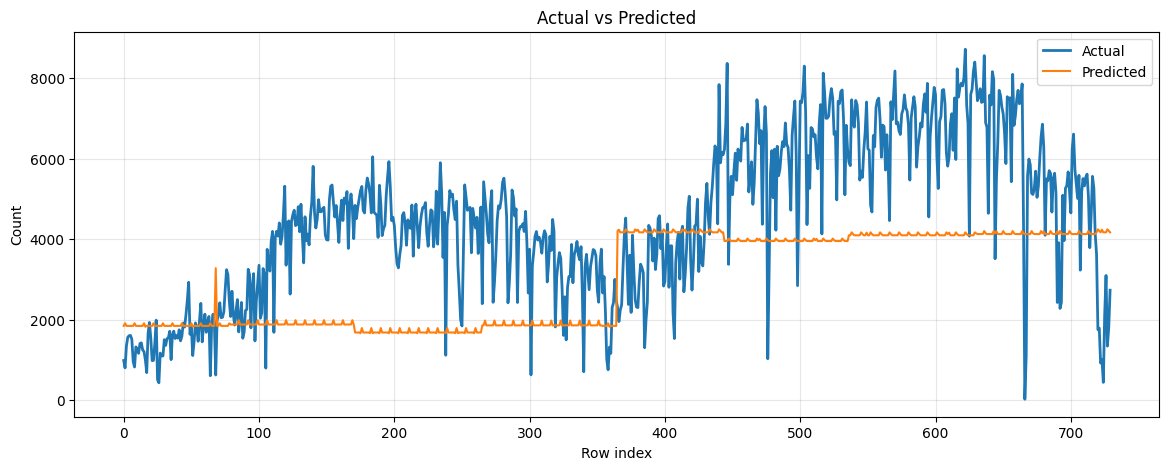

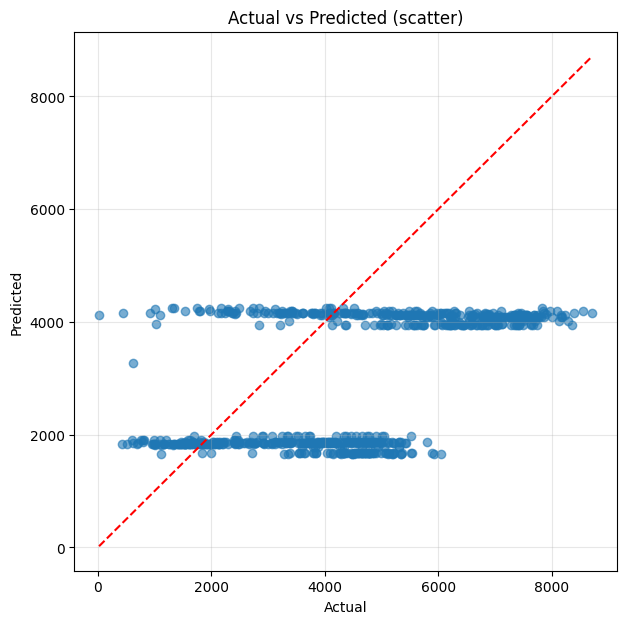

Saved predictions_full.csv — rows: 730


In [84]:
# ...existing code...
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from pathlib import Path

# drop target
if 'cnt' in test_df.columns:
    df_features = test_df.drop(columns=['cnt'])
else:
    df_features = test_df.copy()

# drop any remaining object columns (dates etc.) since model expects numeric
obj_cols = df_features.select_dtypes(include=['object']).columns.tolist()
if obj_cols:
    df_features.drop(columns=obj_cols, inplace=True)

# 3) load model + scaler
model_path = Path("rf_rg_model.pkl")
model = joblib.load(model_path)
scaler = None
scaler_path = Path("scaler.pkl")
if scaler_path.exists():
    scaler = joblib.load(scaler_path)

# 4) align features with model
if hasattr(model, "feature_names_in_"):
    req = list(model.feature_names_in_)
    missing = [c for c in req if c not in df_features.columns]
    extra = [c for c in df_features.columns if c not in req]
    if missing:
        raise ValueError(f"Missing columns required by model: {missing}")
    if extra:
        # drop extras and reorder
        df_features = df_features[req]
    X = df_features.values
else:
    # no feature names stored — rely on numeric columns and n_features_in_
    n_req = getattr(model, "n_features_in_", None)
    numeric = df_features.select_dtypes(include=[np.number])
    if n_req is not None and numeric.shape[1] == n_req:
        X = numeric.values
    elif n_req is not None and numeric.shape[1] != n_req:
        # give clear diagnostic to decide next step
        print("Model expects", n_req, "features but test numeric features:", numeric.shape[1])
        print("Test numeric columns:\n", numeric.columns.tolist())
        # If you want automatic trimming: remove last columns until match (risky)
        raise ValueError("Feature count mismatch — inspect above lists and adapt preprocessing to match training features.")
    else:
        # no n_features_in_ — fall back
        X = numeric.values

# 5) apply scaler if available
if scaler is not None:
    X = scaler.transform(X)

# 6) predict and inverse-transform (trained on sqrt(cnt))
pred_sqrt = model.predict(X)
pred_cnt = np.rint(np.square(pred_sqrt)).astype(int)

# 7) results and plots
comparison = pd.DataFrame({"Actual": actual_cnt, "Predicted": pred_cnt})
plt.figure(figsize=(14,5))
plt.plot(comparison['Actual'], label='Actual', linewidth=2)
plt.plot(comparison['Predicted'], label='Predicted', linewidth=1.5)
plt.xlabel('Row index'); plt.ylabel('Count'); plt.title('Actual vs Predicted')
plt.legend(); plt.grid(alpha=0.3); plt.show()

plt.figure(figsize=(7,7))
plt.scatter(comparison['Actual'], comparison['Predicted'], alpha=0.6)
mn, mx = comparison['Actual'].min(), comparison['Actual'].max()
plt.plot([mn,mx],[mn,mx],'r--'); plt.xlabel('Actual'); plt.ylabel('Predicted'); plt.title('Actual vs Predicted (scatter)')
plt.grid(alpha=0.3); plt.show()

comparison.to_csv("predictions_full.csv", index=False)
print("Saved predictions_full.csv — rows:", len(pred_cnt))
# ...existing code...

In [85]:
# ...existing code...
import pandas as pd
import numpy as np

# get dataframe: prefer in-memory `comparison`, fallback to saved CSV
if 'comparison' in globals():
    df = comparison.copy()
else:
    df = pd.read_csv("predictions_full.csv")

# include row index and ensure columns named clearly
df = df.reset_index().rename(columns={'index':'row_index'})

# save full values to CSV and print brief summary + first/last rows
out_path = "predictions_full_values.csv"
df.to_csv(out_path, index=False)
print(f"Saved all values to: {out_path}\nRows: {len(df)}\n")

print("First 10 rows:")
print(df.head(10).to_string(index=False))

print("\nLast 10 rows:")
print(df.tail(10).to_string(index=False))

print("\nSummary statistics (Actual vs Predicted):")
print(df[['Actual','Predicted']].describe())

# If you want to display all rows in the notebook (careful for large datasets):
# pd.set_option('display.max_rows', None)
# display(df)
# pd.reset_option('display.max_rows')
# ...existing code...

Saved all values to: predictions_full_values.csv
Rows: 730

First 10 rows:
 row_index  Actual  Predicted
         0     985       1843
         1     801       1908
         2    1349       1843
         3    1562       1843
         4    1600       1843
         5    1606       1843
         6    1510       1843
         7     959       1843
         8     822       1908
         9    1321       1843

Last 10 rows:
 row_index  Actual  Predicted
       720    1749       4240
       721    1787       4203
       722     920       4167
       723    1013       4232
       724     441       4167
       725    2114       4167
       726    3095       4167
       727    1341       4240
       728    1796       4203
       729    2729       4167

Summary statistics (Actual vs Predicted):
            Actual    Predicted
count   730.000000   730.000000
mean   4508.006849  2964.249315
std    1936.011647  1139.783929
min      22.000000  1662.000000
25%    3169.750000  1855.000000
50%    4548.500

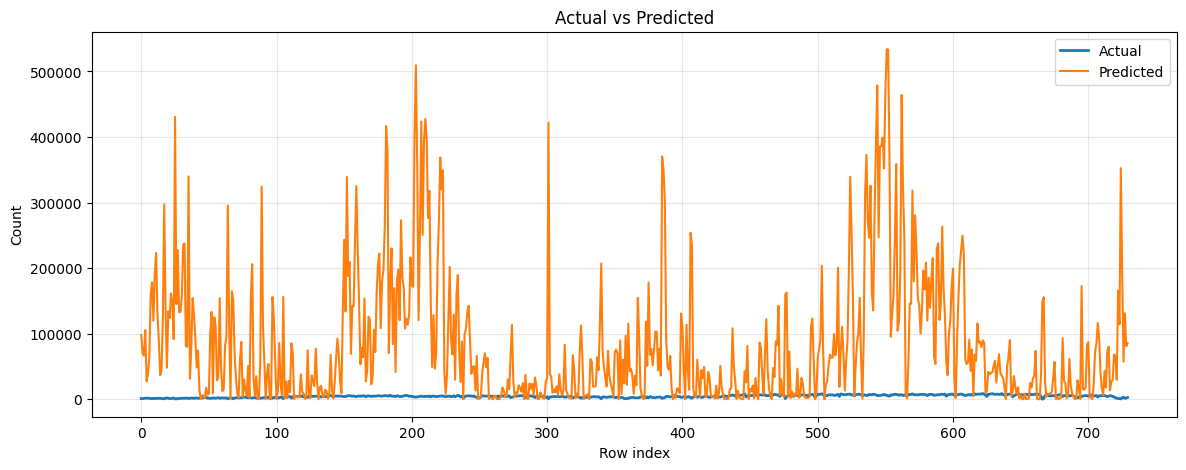

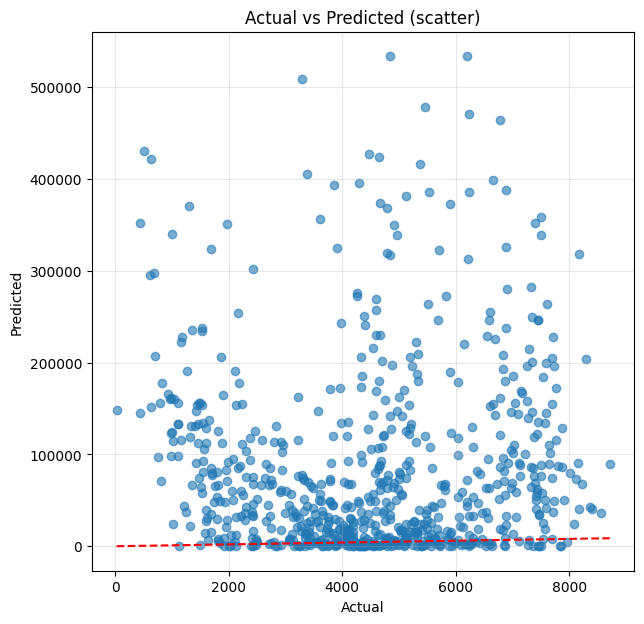

Saved predictions_full.csv — rows: 730


In [86]:
# ...existing code...
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from pathlib import Path

# drop target
if 'cnt' in test_df.columns:
    df_features = test_df.drop(columns=['cnt'])
else:
    df_features = test_df.copy()

# drop any remaining object columns (dates etc.) since model expects numeric
obj_cols = df_features.select_dtypes(include=['object']).columns.tolist()
if obj_cols:
    df_features.drop(columns=obj_cols, inplace=True)

# 3) load model + scaler
model_path = Path("regressor.pkl")
model = joblib.load(model_path)
scaler = None
scaler_path = Path("scaler.pkl")
if scaler_path.exists():
    scaler = joblib.load(scaler_path)

# 4) align features with model
if hasattr(model, "feature_names_in_"):
    req = list(model.feature_names_in_)
    missing = [c for c in req if c not in df_features.columns]
    extra = [c for c in df_features.columns if c not in req]
    if missing:
        raise ValueError(f"Missing columns required by model: {missing}")
    if extra:
        # drop extras and reorder
        df_features = df_features[req]
    X = df_features.values
else:
    # no feature names stored — rely on numeric columns and n_features_in_
    n_req = getattr(model, "n_features_in_", None)
    numeric = df_features.select_dtypes(include=[np.number])
    if n_req is not None and numeric.shape[1] == n_req:
        X = numeric.values
    elif n_req is not None and numeric.shape[1] != n_req:
        # give clear diagnostic to decide next step
        print("Model expects", n_req, "features but test numeric features:", numeric.shape[1])
        print("Test numeric columns:\n", numeric.columns.tolist())
        # If you want automatic trimming: remove last columns until match (risky)
        raise ValueError("Feature count mismatch — inspect above lists and adapt preprocessing to match training features.")
    else:
        # no n_features_in_ — fall back
        X = numeric.values

# 5) apply scaler if available
if scaler is not None:
    X = scaler.transform(X)

# 6) predict and inverse-transform (trained on sqrt(cnt))
pred_sqrt = model.predict(X)
pred_cnt = np.rint(np.square(pred_sqrt)).astype(int)

# 7) results and plots
comparison = pd.DataFrame({"Actual": actual_cnt, "Predicted": pred_cnt})
plt.figure(figsize=(14,5))
plt.plot(comparison['Actual'], label='Actual', linewidth=2)
plt.plot(comparison['Predicted'], label='Predicted', linewidth=1.5)
plt.xlabel('Row index'); plt.ylabel('Count'); plt.title('Actual vs Predicted')
plt.legend(); plt.grid(alpha=0.3); plt.show()

plt.figure(figsize=(7,7))
plt.scatter(comparison['Actual'], comparison['Predicted'], alpha=0.6)
mn, mx = comparison['Actual'].min(), comparison['Actual'].max()
plt.plot([mn,mx],[mn,mx],'r--'); plt.xlabel('Actual'); plt.ylabel('Predicted'); plt.title('Actual vs Predicted (scatter)')
plt.grid(alpha=0.3); plt.show()

comparison.to_csv("predictions_full.csv", index=False)
print("Saved predictions_full.csv — rows:", len(pred_cnt))
# ...existing code...

In [87]:
# ...existing code...
import pandas as pd
import numpy as np

# get dataframe: prefer in-memory `comparison`, fallback to saved CSV
if 'comparison' in globals():
    df = comparison.copy()
else:
    df = pd.read_csv("predictions_full.csv")

# include row index and ensure columns named clearly
df = df.reset_index().rename(columns={'index':'row_index'})

# save full values to CSV and print brief summary + first/last rows
out_path = "predictions_full_values.csv"
df.to_csv(out_path, index=False)
print(f"Saved all values to: {out_path}\nRows: {len(df)}\n")

print("First 10 rows:")
print(df.head(10).to_string(index=False))

print("\nLast 10 rows:")
print(df.tail(10).to_string(index=False))

print("\nSummary statistics (Actual vs Predicted):")
print(df[['Actual','Predicted']].describe())

# If you want to display all rows in the notebook (careful for large datasets):
# pd.set_option('display.max_rows', None)
# display(df)
# pd.reset_option('display.max_rows')
# ...existing code...

Saved all values to: predictions_full_values.csv
Rows: 730

First 10 rows:
 row_index  Actual  Predicted
         0     985      97894
         1     801      70669
         2    1349      66358
         3    1562     105582
         4    1600      27030
         5    1606      39073
         6    1510      64567
         7     959     160392
         8     822     178142
         9    1321     119516

Last 10 rows:
 row_index  Actual  Predicted
       720    1749      65607
       721    1787      29655
       722     920     166001
       723    1013     114476
       724     441     352470
       725    2114     190680
       726    3095      57316
       727    1341     131122
       728    1796      80903
       729    2729      85321

Summary statistics (Actual vs Predicted):
            Actual      Predicted
count   730.000000     730.000000
mean   4508.006849   84309.956164
std    1936.011647  100342.763349
min      22.000000       0.000000
25%    3169.750000   10283.250000
50%